# UI HEALTHCARE DATASET

## DESCRIPTION:
### The dataset below is a collection of healthcare data from the University of Ibadan (Jaja Clinic) from 2015 to 2019.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style('dark')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Healthcare.csv')
df.head(5)

,SNO,DAY,MONTH,YEAR,CATEGORY,DIAGNOSIS,DIAGNOSIS GENERIC,SEX,AGE,DRUG 1,DRUG GENERIC1,DRUG2,DRUG GENERIC2,DRUG3,DRUG GENERIC3
0,99.0,8.0,October,2015,JUNIOR STAFF,ASTHMA,RESPIRATORY DISORDERS,M,58.0,NEFEDIPINE,ANTIHYPERTENSIVE,PULMICORT,ANTI-INFLAMATORY DRUGS,PREDINSOLONE,CORTICOSTEROID
1,31.0,31.0,August,2015,STUDENT,ALLERGY,ALLERGY,M,20.0,LORATIDINE,ANTI-HISTAMINES,VIT C,HAEMATINICS,PCM,ANALGESICS
2,41.0,21.0,September,2015,STUDENT,ALLERGY,ALLERGY,M,22.0,LORATIDINE,ANTI-HISTAMINES,VIT C,HAEMATINICS,PCM,ANALGESICS
3,30.0,12.0,August,2015,STUDENT,ALLERGY,ALLERGY,F,32.0,LORATIDINE,ANTI-HISTAMINES,PRENISOLONE,ANTI-INFLAMATORY DRUGS,DICLOFENAC,ANALGESICS
4,80.0,20.0,August,2015,OTHERS,ALLERGY,ALLERGY,M,37.0,LORATIDINE,ANTI-HISTAMINES,VIT C,HAEMATINICS,PCM,ANALGESICS


In [3]:
df.shape

(78537, 15)

In [4]:
# Dataset description
df.describe()

,DAY,YEAR,AGE
count,78399.000000,78537.000000,78492.000000
mean,16.089695,2017.253142,30.399888
std,8.678727,1.333576,17.304163
min,1.000000,2015.000000,0.500000
25%,9.000000,2016.000000,19.000000
50%,16.000000,2017.000000,25.000000
75%,24.000000,2019.000000,43.000000
max,31.000000,2019.000000,96.000000


### The above contains the vital information concerning the Age, Day patients got tested and the Year.

In [5]:
# Dataset object description
df.describe(include=object)

,SNO,MONTH,CATEGORY,DIAGNOSIS,DIAGNOSIS GENERIC,SEX,DRUG 1,DRUG GENERIC1,DRUG2,DRUG GENERIC2,DRUG3,DRUG GENERIC3
count,78341.0,78537,78537,78537,78537,78532,78537,77610,65652,64958,37016,36477
unique,20397.0,13,7,258,33,19,697,44,689,59,508,36
top,6.0,July,STUDENT,MALARIA,INFECTIONS,F,PCM,ANTIMALARIALS,PCM,ANALGESICS,PCM,HAEMATINICS
freq,417.0,9691,37738,22620,25536,39352,5860,16299,19955,27219,5424,8218


In [6]:
# Name of variables in MONTH Column
df['MONTH'].unique()

array(['October', 'August', 'September', 'November', 'April', 'March',
       'January', 'May', 'June', 'February', 'July', 'December',
       'January '], dtype=object)

In [7]:
# Remove leading/trailing whitespaces
df['MONTH'] = df['MONTH'].str.strip()  

# Correct the duplicate
df['MONTH'] = df['MONTH'].replace('January ', 'January')  

#Checking corrected variable
df['MONTH'].unique()

array(['October', 'August', 'September', 'November', 'April', 'March',
       'January', 'May', 'June', 'February', 'July', 'December'],
      dtype=object)

In [8]:
df['YEAR'].unique()

array([2015, 2016, 2017, 2018, 2019])

In [9]:
# Unique features of SEX column
df['SEX'].unique()

array(['M', 'F', 'F ', 'MN', 'FF', ' M', 'M ', 'MF', ' MF', 'm', 'M7',
       'f', ' F', nan, 'MM', 'HTN, MUSC', ',M', 'OL', 'M,', 'IF'],
      dtype=object)

In [10]:
# Convert data to just M for male or F for Feamle

# Convert to uppercase and remove whitespaces
df['SEX'] = df['SEX'].str.upper().str.strip()  # Convert to uppercase and remove whitespaces

# Mapping values to M for male and F for female
mapping = {'M': 'M', 'F': 'F', 'F ': 'F', 'MN': 'M', 'FF': 'F', ' M': 'M', 'M ': 'M', 'MF': 'M', ' MF': 'M', 'm': 'M', 'M7': 'M', 'f': 'F', ' F': 'F', np.nan: 'F', 'MM': 'M', "'HTN":'M', 'MUSC':'M', ',M': 'M', 'OL':'F', 'M,': 'M', 'IF': 'M', }

# Drop rows containing 'HTN' or 'MUSC' in the 'SEX' column
df = df[~df['SEX'].str.contains('HTN|MUSC', na=False)]

df['SEX'] = df['SEX'].replace(mapping)

# If you want to handle NaN values, you can replace them with a default value, for example, 'U' for unknown
#df['gender'] = df['gender'].replace(np.nan, 'U')

In [11]:
df['SEX'].nunique()

2

In [12]:
df.describe(include = object)

,SNO,MONTH,CATEGORY,DIAGNOSIS,DIAGNOSIS GENERIC,SEX,DRUG 1,DRUG GENERIC1,DRUG2,DRUG GENERIC2,DRUG3,DRUG GENERIC3
count,78340.0,78536,78536,78536,78536,78536,78536,77609,65651,64957,37015,36476
unique,20397.0,12,7,258,33,2,697,44,689,59,508,36
top,6.0,July,STUDENT,MALARIA,INFECTIONS,F,PCM,ANTIMALARIALS,PCM,ANALGESICS,PCM,HAEMATINICS
freq,417.0,9691,37738,22620,25536,39373,5860,16299,19955,27219,5424,8218


In [13]:
# Checking Column Data Types
df.dtypes

SNO                   object
DAY                  float64
MONTH                 object
YEAR                   int64
CATEGORY              object
DIAGNOSIS             object
DIAGNOSIS GENERIC     object
SEX                   object
AGE                  float64
DRUG 1                object
DRUG GENERIC1         object
DRUG2                 object
DRUG GENERIC2         object
DRUG3                 object
DRUG GENERIC3         object
dtype: object

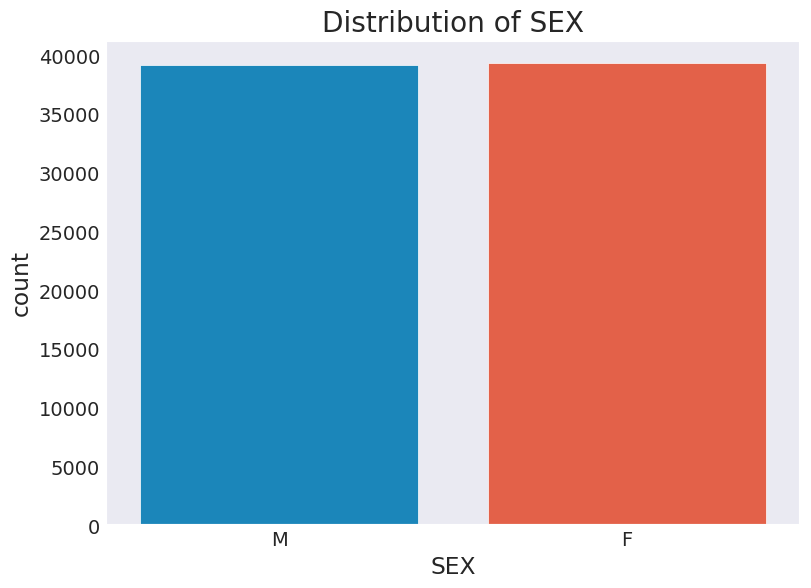

In [14]:
# Distribution of 'SEX'
plt.figure(figsize=(8, 6))
sns.countplot(x='SEX', data=df)
plt.title('Distribution of SEX')
plt.show()

In [15]:
df['SEX'].value_counts()

SEX
F    39373
M    39163
Name: count, dtype: int64

### There are 39,373 Females and 39,163 Males

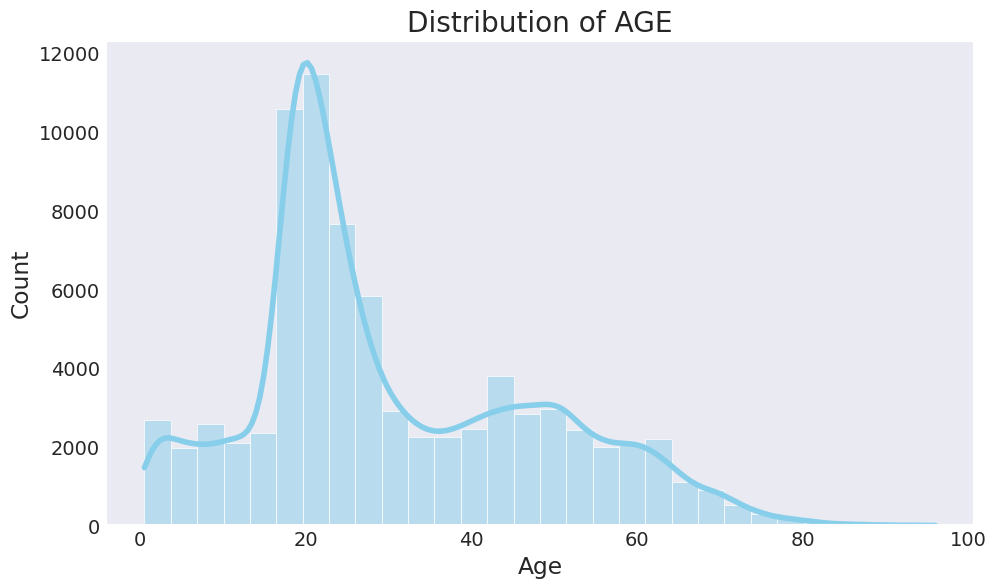

In [16]:
# Distribution of 'AGE'
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of AGE')
plt.xlabel('Age')
plt.show()

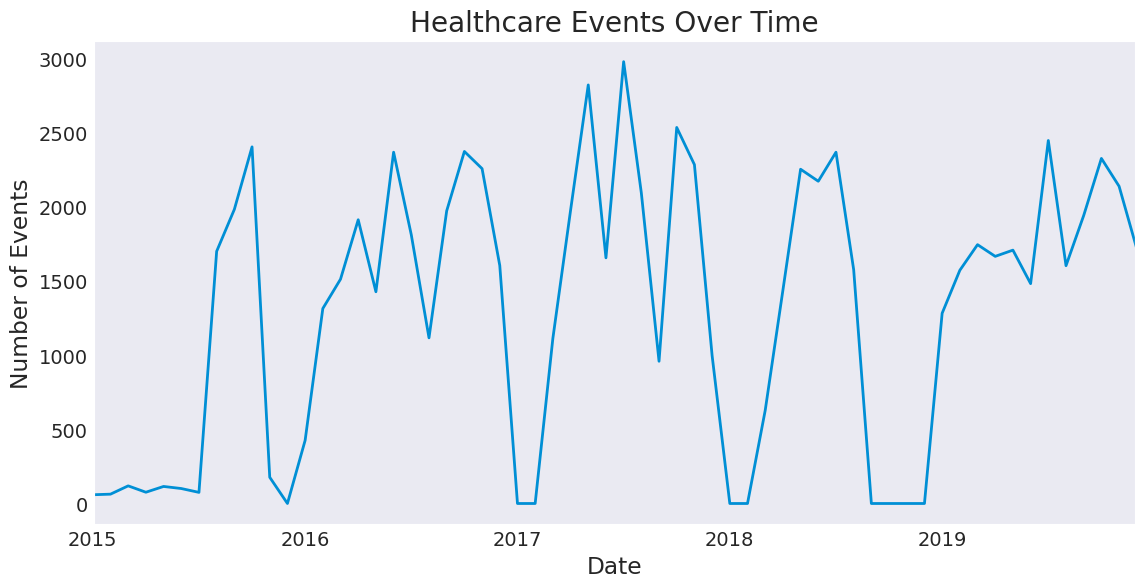

In [17]:
#'DAY' column with the first day of each month
df['DAY'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str) + '-1', errors='coerce')

# Set 'DATE' as the index
df.set_index('DAY', inplace=True)

# Count healthcare events per month
events_per_month = df.resample('M').size()

# Plot trends over time
plt.figure(figsize=(12, 6))
events_per_month.plot(linewidth=2)
plt.title('Healthcare Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

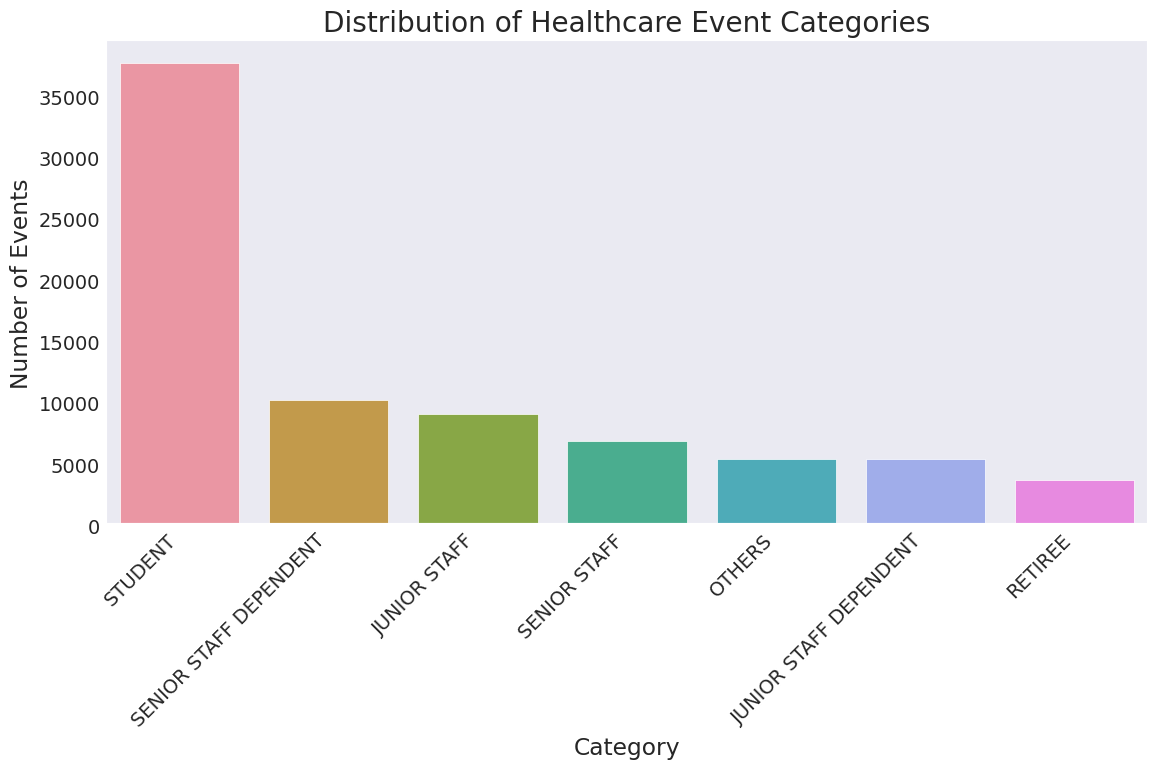

In [18]:
# Distribution of CATEGORY
plt.figure(figsize=(12, 6))
sns.countplot(x='CATEGORY', data=df, order=df['CATEGORY'].value_counts().index)
plt.title('Distribution of Healthcare Event Categories')
plt.xlabel('Category')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')  
plt.show()

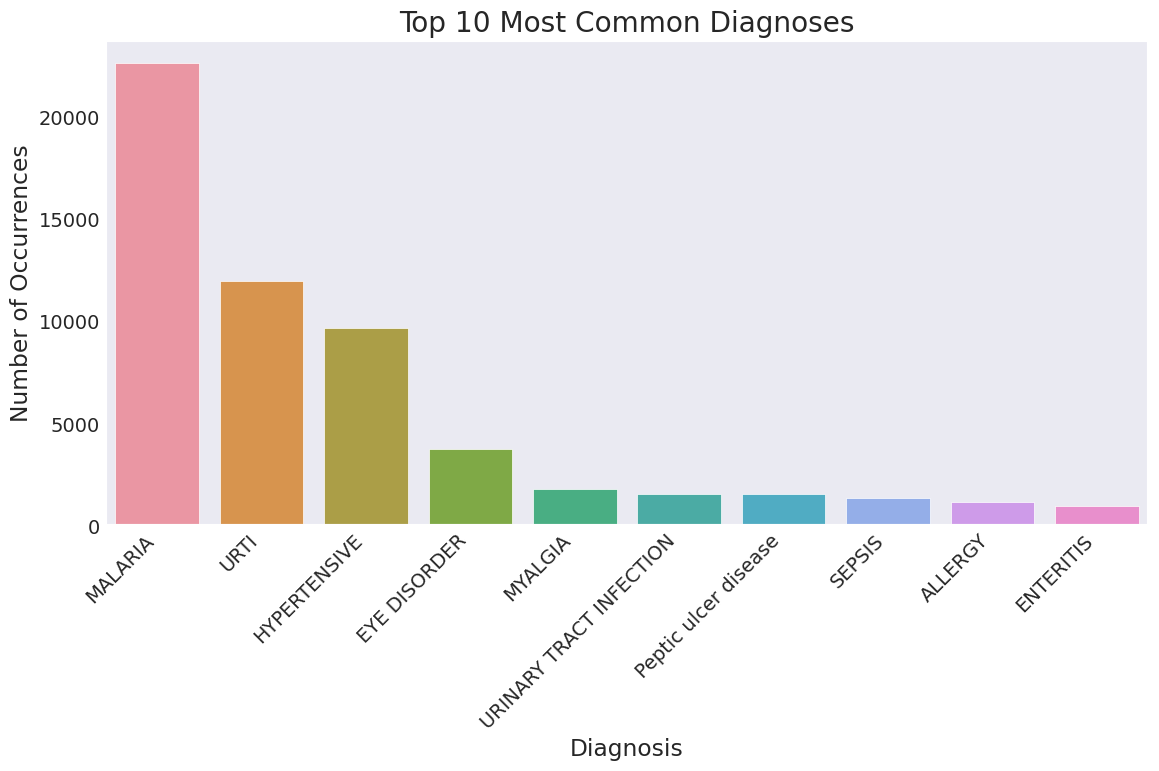

In [19]:
# Most common diagnoses
plt.figure(figsize=(12, 6))
top_diagnoses = df['DIAGNOSIS'].value_counts().head(10)  # Adjust the number as needed
sns.barplot(x=top_diagnoses.index, y=top_diagnoses.values)
plt.title('Top 10 Most Common Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()

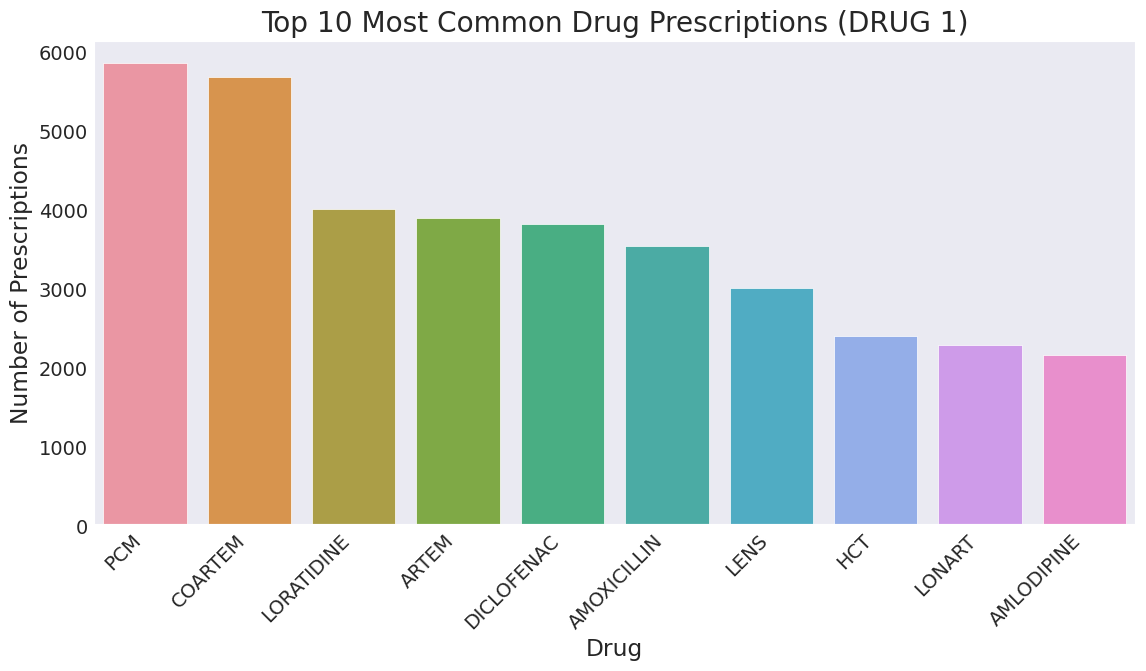

In [20]:
# Most common drug prescriptions (DRUG1)
plt.figure(figsize=(12, 6))
top_drugs1 = df['DRUG 1'].value_counts().head(10)  # Adjust the number as needed
sns.barplot(x=top_drugs1.index, y=top_drugs1.values)
plt.title('Top 10 Most Common Drug Prescriptions (DRUG 1)')
plt.xlabel('Drug')
plt.ylabel('Number of Prescriptions')
plt.xticks(rotation=45, ha='right')
plt.show()

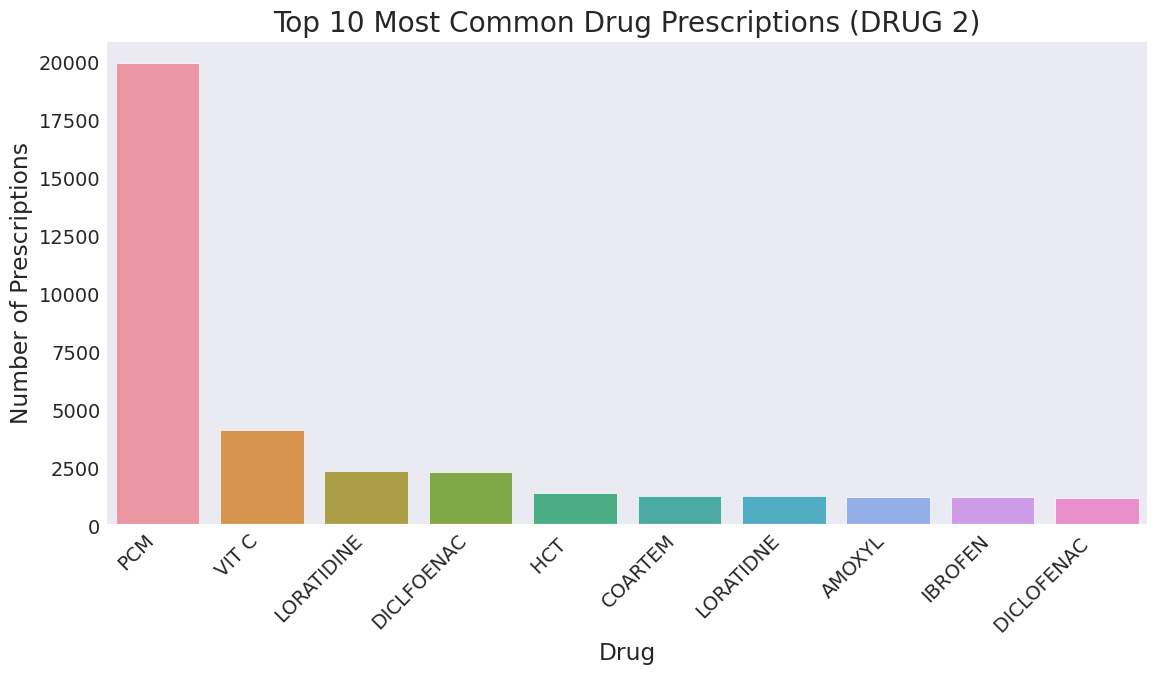

In [21]:
# Most common drug prescriptions (DRUG2)
plt.figure(figsize=(12, 6))
top_drugs1 = df['DRUG2'].value_counts().head(10)  # Adjust the number as needed
sns.barplot(x=top_drugs1.index, y=top_drugs1.values)
plt.title('Top 10 Most Common Drug Prescriptions (DRUG 2)')
plt.xlabel('Drug')
plt.ylabel('Number of Prescriptions')
plt.xticks(rotation=45, ha='right')
plt.show()

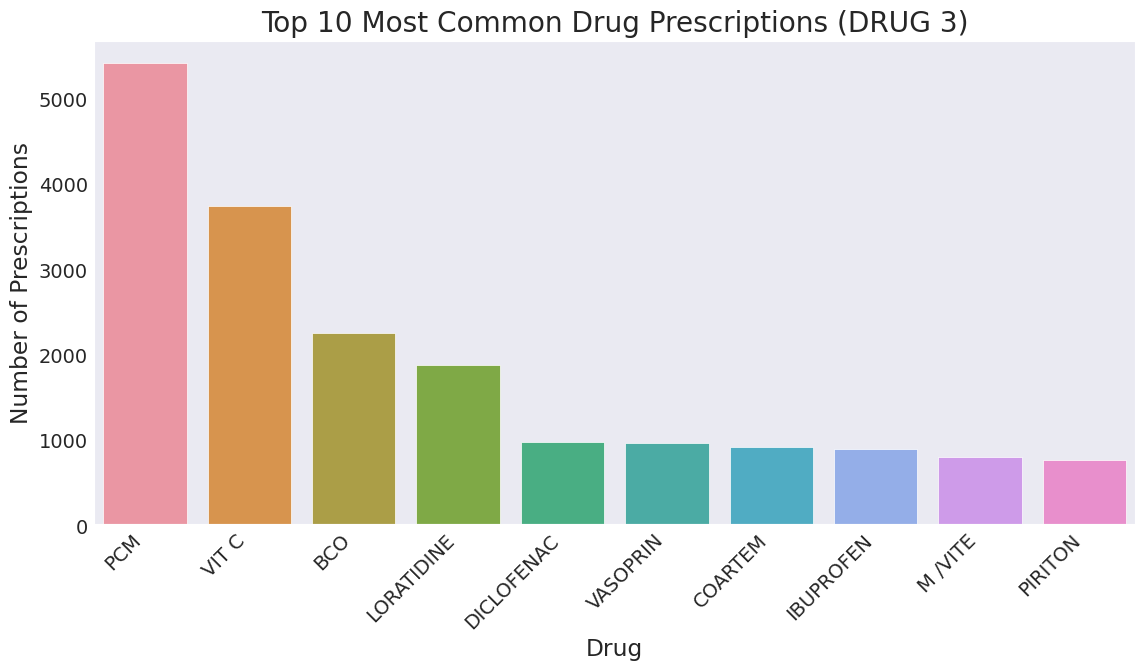

In [22]:
# Most common drug prescriptions (DRUG2)
plt.figure(figsize=(12, 6))
top_drugs1 = df['DRUG3'].value_counts().head(10)  # Adjust the number as needed
sns.barplot(x=top_drugs1.index, y=top_drugs1.values)
plt.title('Top 10 Most Common Drug Prescriptions (DRUG 3)')
plt.xlabel('Drug')
plt.ylabel('Number of Prescriptions')
plt.xticks(rotation=45, ha='right')
plt.show()

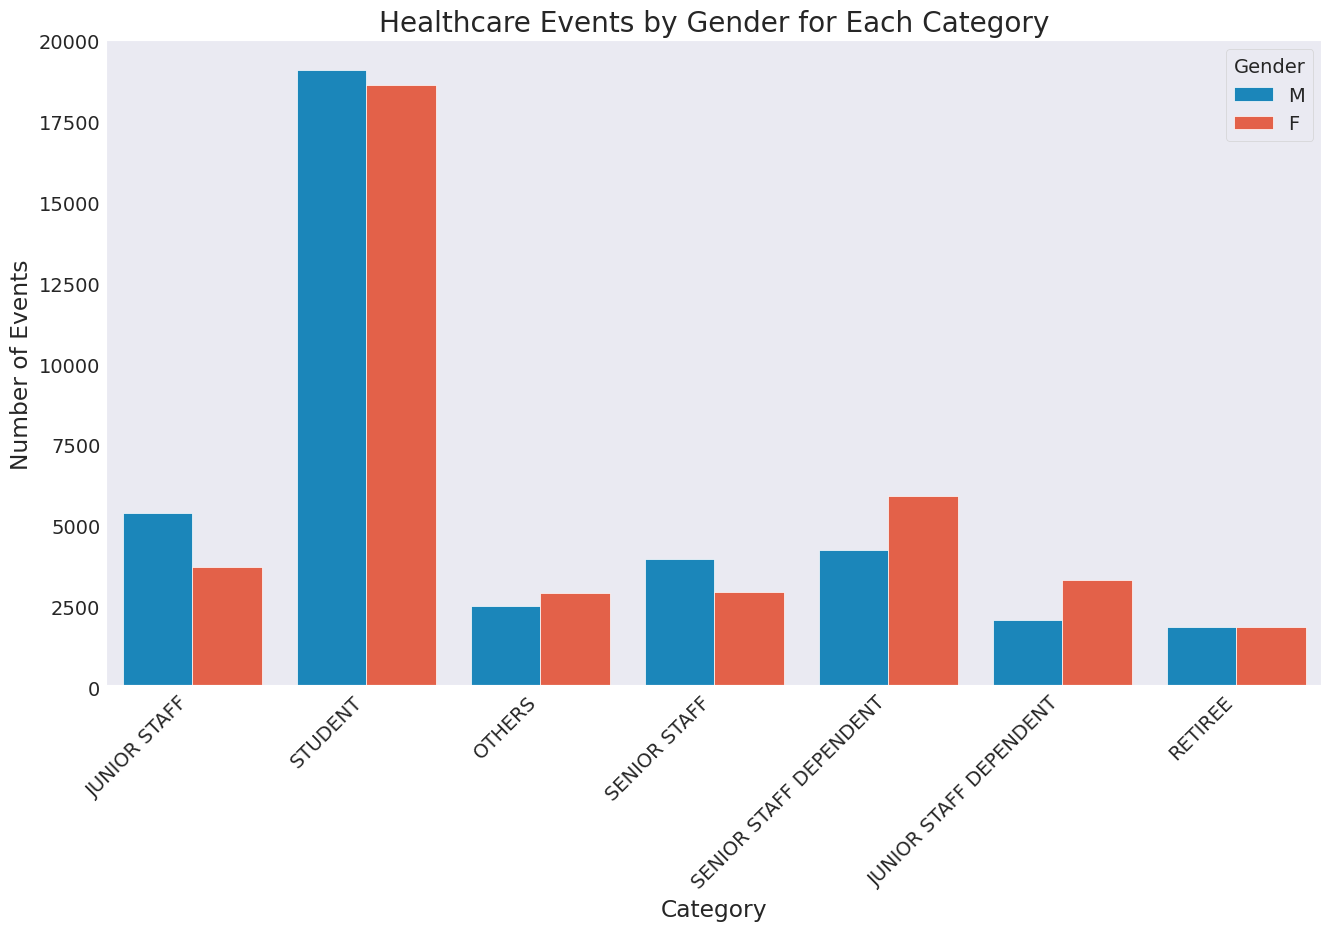

In [23]:
# Healthcare events by gender for each category
plt.figure(figsize=(14, 8))
sns.countplot(x='CATEGORY', hue='SEX', data=df)
plt.title('Healthcare Events by Gender for Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()

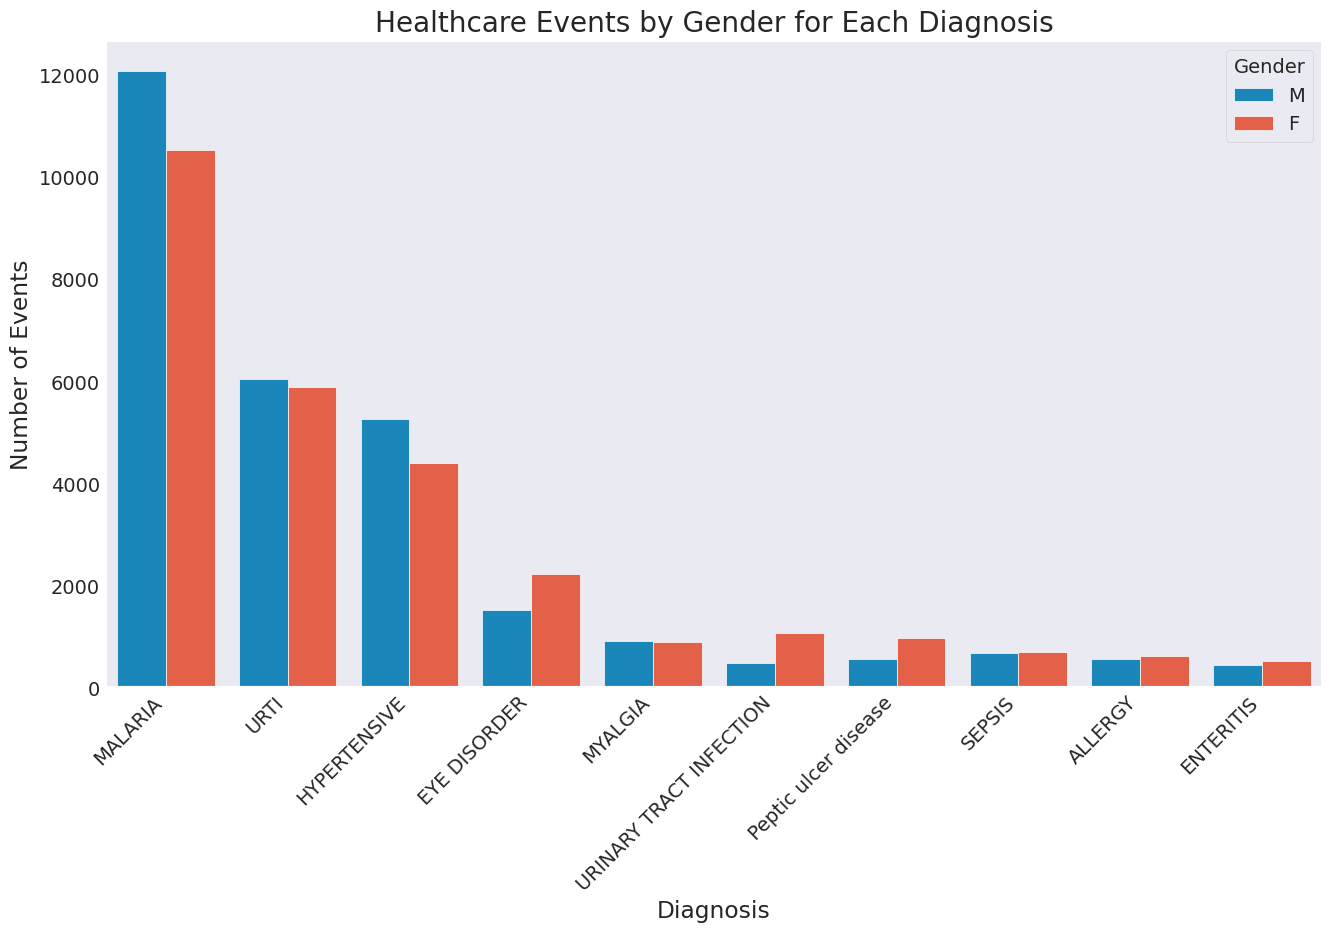

In [24]:
# Healthcare events by gender for each diagnosis
plt.figure(figsize=(14, 8))
sns.countplot(x='DIAGNOSIS', hue='SEX', data=df, order=df['DIAGNOSIS'].value_counts().head(10).index)
plt.title('Healthcare Events by Gender for Each Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()

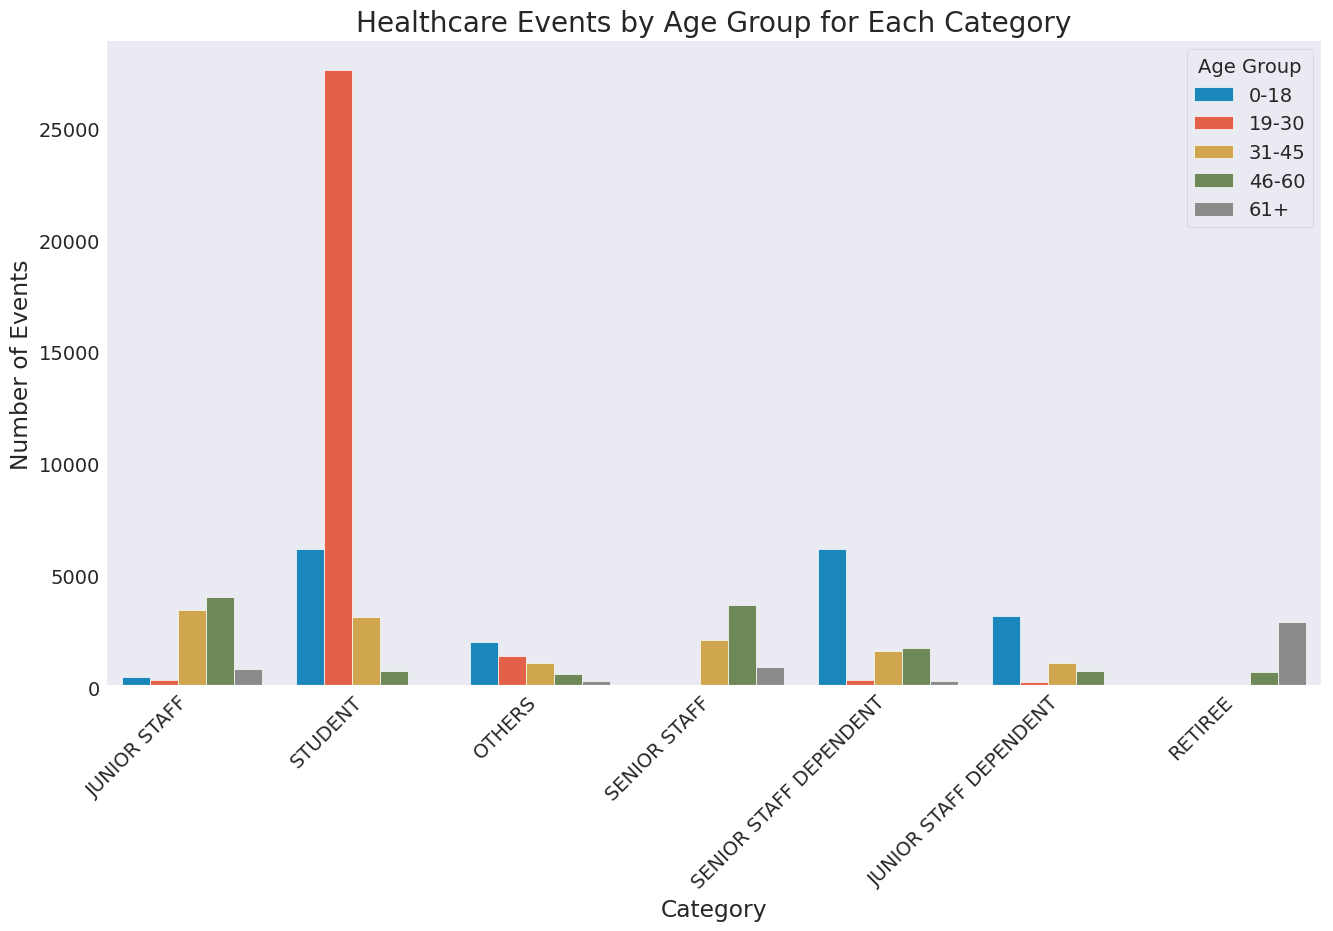

In [25]:
# Define age bins and labels
age_bins = [0, 18, 30, 45, 60, 100]  # Adjust based on requirements
age_labels = ['0-18', '19-30', '31-45', '46-60', '61+']

# Create a new column 'AGE_GROUP' with age groups
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, include_lowest=True)

# Plot healthcare events by age group for each category
plt.figure(figsize=(14, 8))
sns.countplot(x='CATEGORY', hue='AGE_GROUP', data=df)
plt.title('Healthcare Events by Age Group for Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.show()

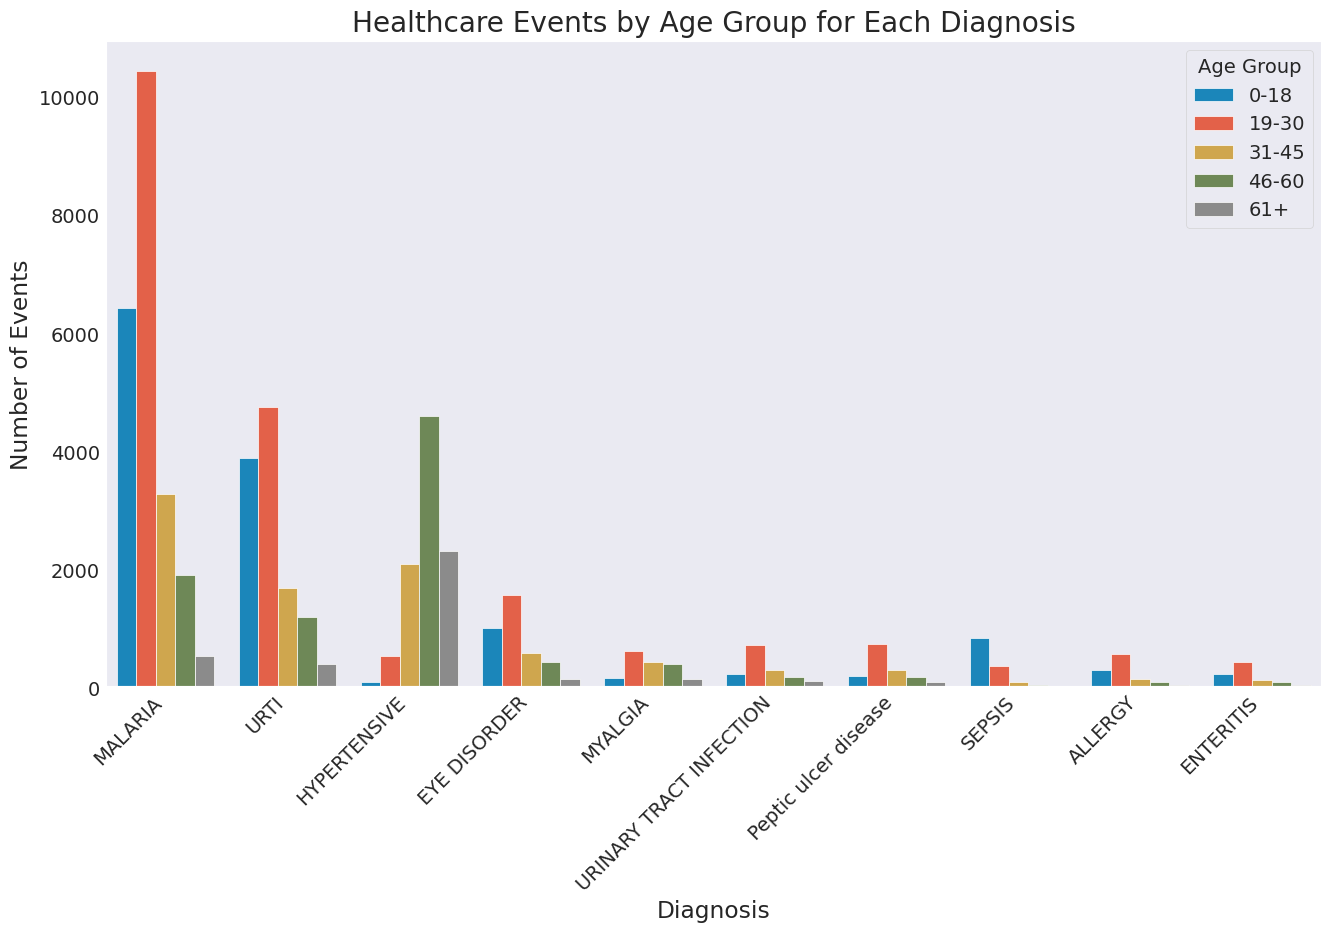

In [26]:
# Plot healthcare events by age group for each diagnosis
plt.figure(figsize=(14, 8))
sns.countplot(x='DIAGNOSIS', hue='AGE_GROUP', data=df, order=df['DIAGNOSIS'].value_counts().head(10).index)
plt.title('Healthcare Events by Age Group for Each Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.show()

In [27]:
# Display the count of missing values in each column
missing_values = df.isnull().sum()

# Display the percentage of missing values in each column
percentage_missing = (df.isnull().sum() / len(df)) * 100

# Create a summary DataFrame
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})

# Display the summary
print(missing_data_summary)


                   Missing Values  Percentage Missing
SNO                           196            0.249567
MONTH                           0            0.000000
YEAR                            0            0.000000
CATEGORY                        0            0.000000
DIAGNOSIS                       0            0.000000
DIAGNOSIS GENERIC               0            0.000000
SEX                             0            0.000000
AGE                            45            0.057299
DRUG 1                          0            0.000000
DRUG GENERIC1                 927            1.180350
DRUG2                       12885           16.406489
DRUG GENERIC2               13579           17.290160
DRUG3                       41521           52.868748
DRUG GENERIC3               42060           53.555058
AGE_GROUP                      45            0.057299


In [28]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mode for the 'AGE' column
imputer_mode = SimpleImputer(strategy='most_frequent')
df['AGE'] = imputer_mode.fit_transform(df['AGE'].values.reshape(-1, 1))

# Convert the 'AGE' column back to the appropriate data type if needed
df['AGE'] = df['AGE'].astype(int)

In [29]:
# Concatenate drug columns into a single column 'DRUGS'
df['DRUGS'] = df['DRUG 1'].fillna('') + ' ' + df['DRUG2'].fillna('') + ' ' + df['DRUG3'].fillna('')

# Remove NaN values by dropping rows with NaN in 'DRUGS' column
df.dropna(subset=['DRUGS'], inplace=True)

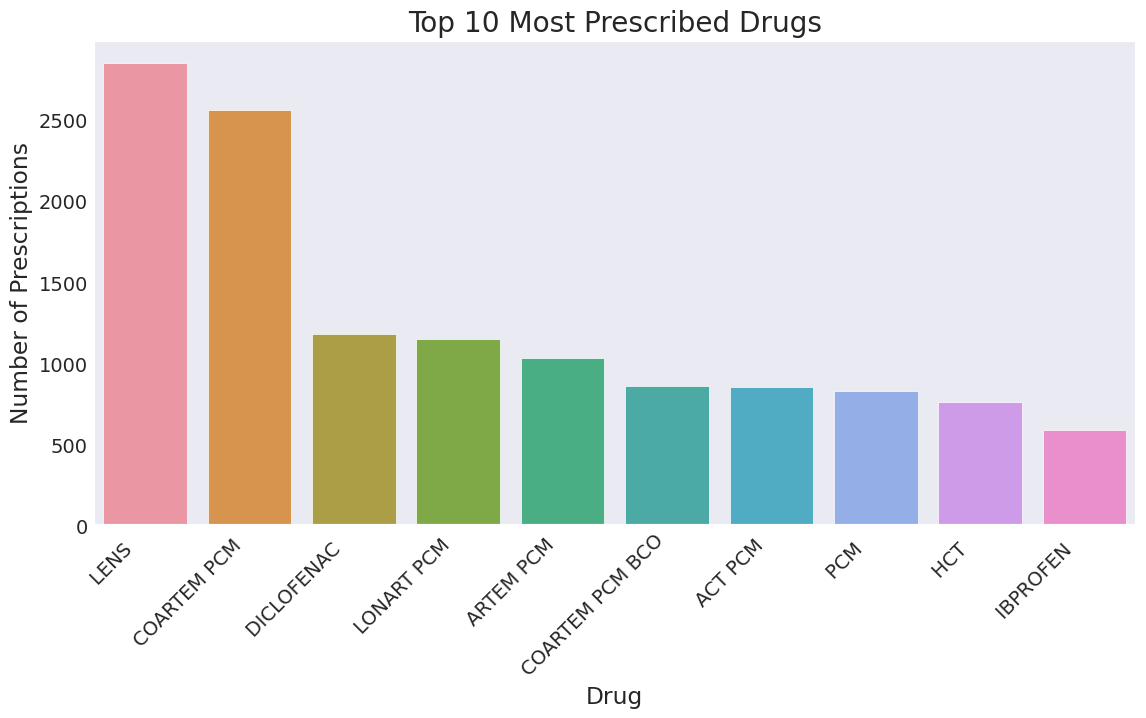

In [30]:
# Create a frequency table for drug prescriptions
top_drugs = df['DRUGS'].value_counts().head(10)

# Plot the most prescribed drugs
plt.figure(figsize=(12, 6))
sns.barplot(x=top_drugs.index, y=top_drugs.values)
plt.title('Top 10 Most Prescribed Drugs')
plt.xlabel('Drug')
plt.ylabel('Number of Prescriptions')
plt.xticks(rotation=45, ha='right')
plt.show()

In [31]:
# Map months to seasons. October to March for Harmattan
def map_to_season(month):
    season_mapping = {
        'January': 'Harmattan',  # January
        'February': 'Harmattan',
        'March': 'Harmattan',
        'April': 'Rainy',      # April
        'May': 'Rainy',
        'June': 'Rainy',
        'July': 'Rainy',
        'August': 'Rainy',
        'September': 'Rainy',
        'October': 'Harmattan',  # October
        'November': 'Harmattan',
        'December': 'Harmattan'
    }
    return season_mapping.get(month,np.nan)

# Create a new column 'SEASON' based on the mapping
df['SEASON'] = df['MONTH'].apply(map_to_season)

In [32]:
# Filter data for Harmattan season
harmattan_data = df[df['SEASON'] == 'Harmattan']

# Filter data for Rainy season
rainy_data = df[df['SEASON'] == 'Rainy']

# Get the top 10 diagnoses for Harmattan and Rainy seasons
top_10_harmattan = harmattan_data['DIAGNOSIS'].value_counts().nlargest(10)
top_10_rainy = rainy_data['DIAGNOSIS'].value_counts().nlargest(10)

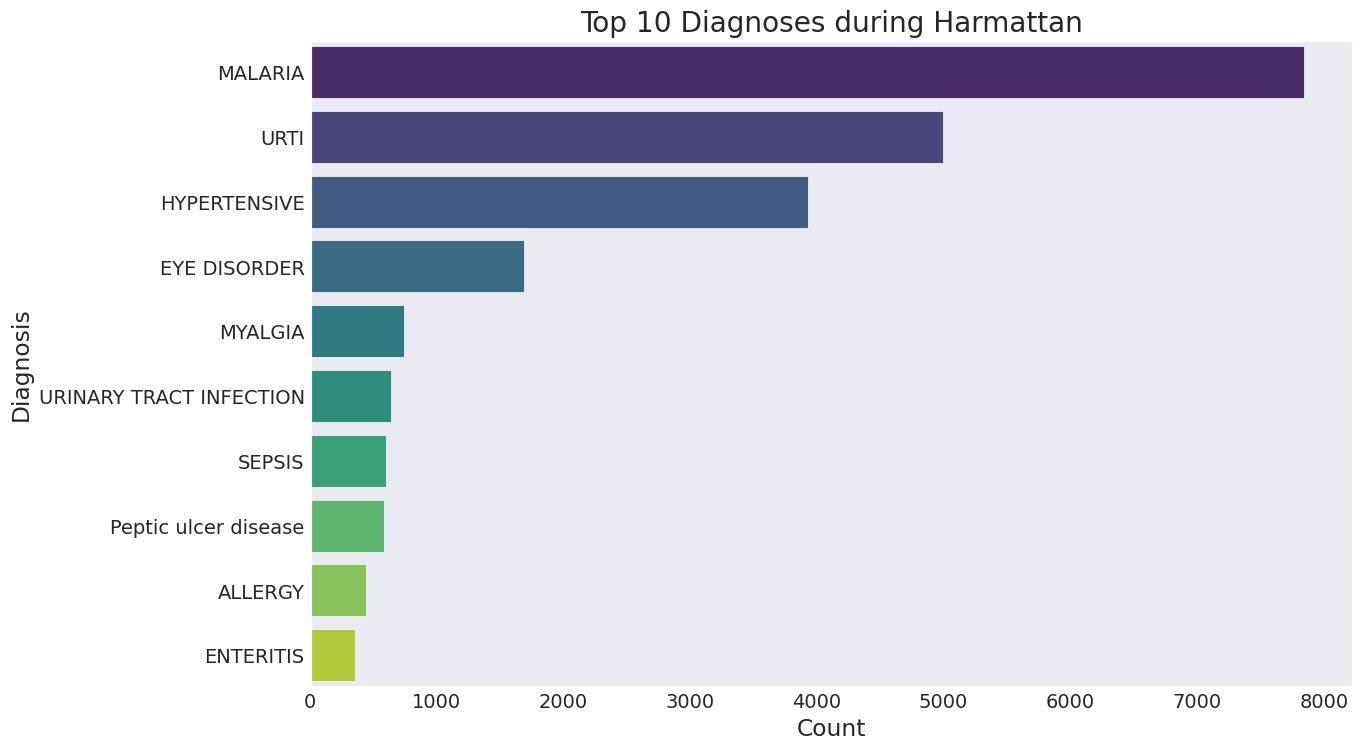

In [33]:
# Top 10 diagnoses for Harmattan
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_harmattan.values, y=top_10_harmattan.index, palette='viridis')
plt.title('Top 10 Diagnoses during Harmattan')
plt.xlabel('Count')
plt.ylabel('Diagnosis')
plt.show()

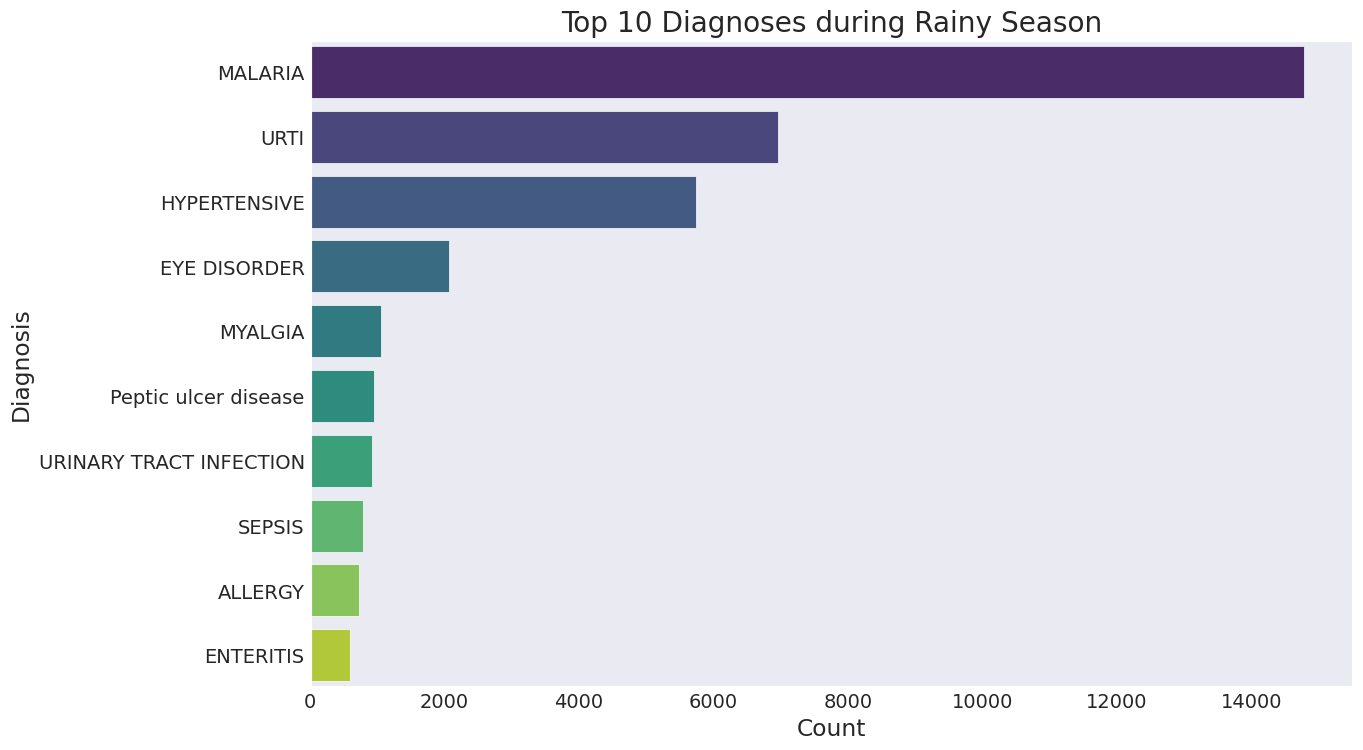

In [34]:
# Plot the top 10 diagnoses for Rainy season
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_rainy.values, y=top_10_rainy.index, palette='viridis')
plt.title('Top 10 Diagnoses during Rainy Season')
plt.xlabel('Count')
plt.ylabel('Diagnosis')
plt.show()

In [35]:
df

,SNO,MONTH,YEAR,CATEGORY,DIAGNOSIS,DIAGNOSIS GENERIC,SEX,AGE,DRUG 1,DRUG GENERIC1,DRUG2,DRUG GENERIC2,DRUG3,DRUG GENERIC3,AGE_GROUP,DRUGS,SEASON
DAY,,,,,,,,,,,,,,,,,
2015-10-01,99.0,October,2015,JUNIOR STAFF,ASTHMA,RESPIRATORY DISORDERS,M,58,NEFEDIPINE,ANTIHYPERTENSIVE,PULMICORT,ANTI-INFLAMATORY DRUGS,PREDINSOLONE,CORTICOSTEROID,46-60,NEFEDIPINE PULMICORT PREDINSOLONE,Harmattan
2015-08-01,31.0,August,2015,STUDENT,ALLERGY,ALLERGY,M,20,LORATIDINE,ANTI-HISTAMINES,VIT C,HAEMATINICS,PCM,ANALGESICS,19-30,LORATIDINE VIT C PCM,Rainy
2015-09-01,41.0,September,2015,STUDENT,ALLERGY,ALLERGY,M,22,LORATIDINE,ANTI-HISTAMINES,VIT C,HAEMATINICS,PCM,ANALGESICS,19-30,LORATIDINE VIT C PCM,Rainy
2015-08-01,30.0,August,2015,STUDENT,ALLERGY,ALLERGY,F,32,LORATIDINE,ANTI-HISTAMINES,PRENISOLONE,ANTI-INFLAMATORY DRUGS,DICLOFENAC,ANALGESICS,31-45,LORATIDINE PRENISOLONE DICLOFENAC,Rainy
2015-08-01,80.0,August,2015,OTHERS,ALLERGY,ALLERGY,M,37,LORATIDINE,ANTI-HISTAMINES,VIT C,HAEMATINICS,PCM,ANALGESICS,31-45,LORATIDINE VIT C PCM,Rainy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,60,January,2019,RETIREE,BITE,WOUND/INJURY,M,67,AMOXICILLIN,ANTIBIOTICS,IBUROFEN,ANALGESICS,NaN,NaN,61+,AMOXICILLIN IBUROFEN,Harmattan
2019-06-01,86,June,2019,RETIREE,INJURY,WOUND/INJURY,M,69,TT,ANTIBIOTICS,DICLOFENAC,ANALGESICS,NaN,NaN,61+,TT DICLOFENAC,Rainy
2019-05-01,71,May,2019,RETIREE,WOUND,WOUND/INJURY,M,69,VIT C,HAEMATINICS,NaN,NaN,NaN,NaN,61+,VIT C,Rainy


In [36]:
df.groupby('SEASON')['DIAGNOSIS'].count()

SEASON
Harmattan    30682
Rainy        47854
Name: DIAGNOSIS, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

In [39]:
# Assuming 'DIAGNOSIS' and 'DRUGS' are the relevant columns
# Sample 10% of the dataset
df_sampled = df.sample(frac=0.5, random_state=42)

# Assuming 'DIAGNOSIS' and 'DRUGS' are the relevant columns
X = df_sampled['DIAGNOSIS'].str.lower()
y = df_sampled['DRUGS'].str.lower()

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_words)

X = X.apply(preprocess_text)

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the text data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create a Naive Bayes classifier
classifier = MultinomialNB()

# Train the model
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Save the trained model and vectorizer to a file using pickle
with open('drug_prediction_model_nlp_sampled.pkl', 'wb') as model_file:
    pickle.dump((classifier, vectorizer), model_file)